In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
shape = np.array([[7,0], [6,5], [1, 6], [-4, 4], [-2, -3], [3,-3]])
# shape = np.array([[4,4], [-4,4], [-4,-4], [4,-4]])
O = np.array([sum(shape[:,0]) / len(shape[:,0]), sum(shape[:,1]) / len(shape[:,1])])
angles = [math.atan2(shape[i, 1] - O[1], shape[i, 0] - O[0]) for i in range(len(shape))]
angles = np.array([i if i >= 0 else i + 2*math.pi for i in angles])
shape = shape[angles.argsort()]
angles = angles[angles.argsort()]
x = shape[:, 0]
y = shape[:, 1]
print(angles)
print(shape)

[0.69865982 1.75390714 2.73670087 4.0068208  4.96606308 6.00063035]
[[ 6  5]
 [ 1  6]
 [-4  4]
 [-2 -3]
 [ 3 -3]
 [ 7  0]]


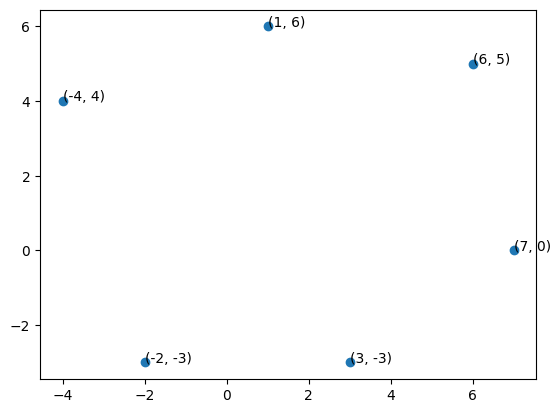

In [4]:
plt.scatter(x,y)
for (xi, yi) in zip(x, y):
    plt.text(xi, yi, f'({xi}, {yi})')
plt.show()

In [5]:
def dist(angle):
    t = angle % (2*math.pi)
    if t in angles:
        return np.linalg.norm(shape[np.where(angles == t)[0]]-O)
    else:
        adjusted_angles = angles-t
        for i in range(len(adjusted_angles)):
            if adjusted_angles[i] > math.pi:
                adjusted_angles[i] = adjusted_angles[i] - 2*math.pi
            elif adjusted_angles[i] < -math.pi:
                adjusted_angles[i] = adjusted_angles[i] + 2*math.pi
        positive_angles = [a for a in adjusted_angles if a > 0]
        negative_angles = [a for a in adjusted_angles if a < 0]
        B = shape[np.where(adjusted_angles == min(positive_angles))[0]][0]
        A = shape[np.where(adjusted_angles == max(negative_angles))[0]][0]
        theta = -max(negative_angles)
        a = math.acos(np.dot(O-A, B-A)/(np.linalg.norm(O-A)*np.linalg.norm(B-A)))
        distance = np.linalg.norm(O-A) * math.sin(a) / math.sin(math.pi - theta - a)
        return distance


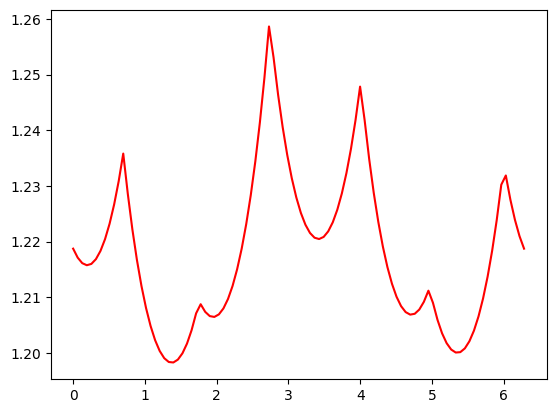

75.01894518579144


/var/folders/ll/7lzf96v108v5pr1s10ycxz_h0000gn/T/ipykernel_81294/3966933791.py:9: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_2 = np.trapz(distances_squared, x=thetas)


In [8]:
thetas = np.linspace(0, 2*math.pi, 100)
distances = [dist(th) for th in thetas]
distances_sqrt = [math.sqrt(dist(th)) for th in thetas]
distances_squared = [0.5*dist(th)**2 for th in thetas]
plt.plot(thetas, distances_sqrt, color='red')
plt.show()
delta_theta = thetas[1]-thetas[0]
l = list(distances)
area_2 = np.trapz(distances_squared, x=thetas)
print(area_2)